In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report

In [2]:
#import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
target = 'NObeyesdad'
X_train = train.drop(target, axis = 1)

# Perform one-hot encoding for non-numeric columns
encoder = OneHotEncoder()

# Select non-numeric columns
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns

# Fit and transform the X_train DataFrame
X_train_encoded = encoder.fit_transform(X_train[non_numeric_cols])

# Convert the encoded data to a DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(non_numeric_cols))

# Concatenate the encoded DataFrame with the remaining columns from X_train
X_train_encoded_df = pd.concat([X_train.drop(non_numeric_cols, axis=1), X_train_encoded_df], axis=1)
X_train_encoded_df = X_train_encoded_df.drop(['id'], axis=1)


# Perform label encoding
le = LabelEncoder()
y_train = le.fit_transform(train[target])

In [4]:
variables = X_train_encoded_df.columns
model = XGBClassifier(learning_rate=0.2, n_estimators=200, max_depth=3, subsample=0.7, feature_names=variables)
model.fit(X_train_encoded_df, y_train)
y_train_pred = model.predict(X_train_encoded_df)
cv_scores = cross_val_score(model, X_train_encoded_df, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')
print(classification_report(y_train, y_train_pred))

[13:43:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "feature_names" } are not used.

[13:43:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "feature_names" } are not used.

[13:43:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "feature_names" } are not used.

[13:43:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "feature_names" } are not used.

[13:43:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "feature_names" } 

Text(0.5, 1.0, 'BDT Variable Importance for Obesity Prediction')

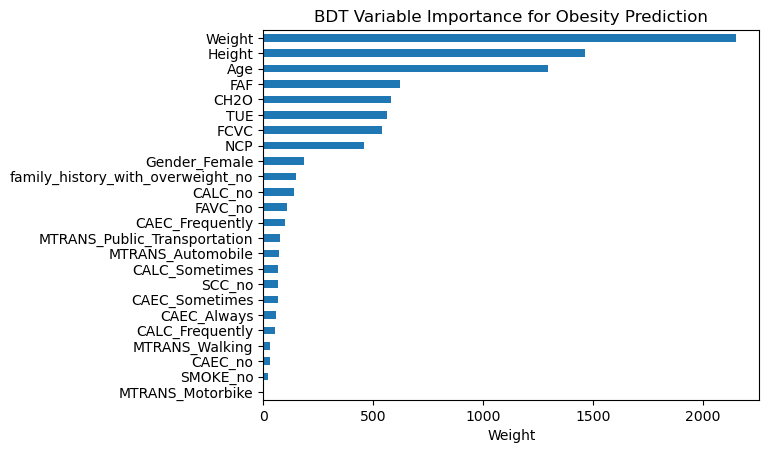

In [5]:
variableImportance = model.get_booster().get_score(importance_type="weight")

t=pd.DataFrame(variableImportance.values(),index=list(variableImportance.keys()), columns=["values"]).sort_values(by="values")
t.plot.barh(legend=None,xlabel="Weight",ylabel="")
plt.title("BDT Variable Importance for Obesity Prediction")